# UJIAN AKHIR SEMESTER - FINAL PROJECT
# Big Data and Predictive Analytics 2025

# Kelompok
# 1. Adi Vesadeo - 23.11.5774


# Tema Eksperimen : Prediksi Harga Sambal Menggunakan Regresi Linier dari Data Tokopedia

# Rule :
# Lakukan eksperimen untuk melakukan prediksi menggunakan regresi linier sederhana dan atau regresi linier berganda dari dataset yang digunakan.
# Buat Visualisasi dari eksperimen yang dilakukan. (Jumlah minimal ada 3 visualisasi berbeda)

# Data Collection
# EDA dan Visualisasi data
# Analisis Korelasi
# Membuat Model Regresi Linier
# Evaluasi Model Linier

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("sambal_dataset_1000_clean.csv")

# Tampilkan 5 baris awal
df.head()


,ID,Nama Produk,Jenis Sambal,Harga,Stok,Tanggal Produksi,Tanggal Expired,Rating,Penjual,Lokasi
0,1,Sambal Sambal Terasi 479ml,Sambal Tomat,26049,114,7/15/2025,12/23/2025,4.3,Perum Safitri Tbk,Singkawang
1,2,Sambal Sambal Roa 116ml,Sambal Terasi,16140,111,7/15/2025,2/9/2026,3.8,Perum Jailani (Persero) Tbk,Pontianak
2,3,Sambal Sambal Matah 466ml,Sambal Roa,24446,229,7/15/2025,3/4/2026,4.5,PD Sihotang Pertiwi,Batam
3,4,Sambal Sambal Ijo 457ml,Sambal Roa,32298,142,7/15/2025,12/31/2025,3.0,PD Nurdiyanti (Persero) Tbk,Subulussalam
4,5,Sambel Sambal Bawang 147ml,Sambal Roa,16338,183,7/15/2025,4/7/2026,4.0,Perum Nugroho Tbk,Serang


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Nama Produk       1000 non-null   object 
 2   Jenis Sambal      1000 non-null   object 
 3   Harga             1000 non-null   int64  
 4   Stok              1000 non-null   int64  
 5   Tanggal Produksi  1000 non-null   object 
 6   Tanggal Expired   1000 non-null   object 
 7   Rating            1000 non-null   float64
 8   Penjual           1000 non-null   object 
 9   Lokasi            1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB
None
                ID         Harga         Stok       Rating
count  1000.000000   1000.000000  1000.000000  1000.000000
mean    500.500000  42218.405000   249.319000     3.794100
std     288.819436  18787.246863   142.392418     0.707867
min       1.000000  10044.

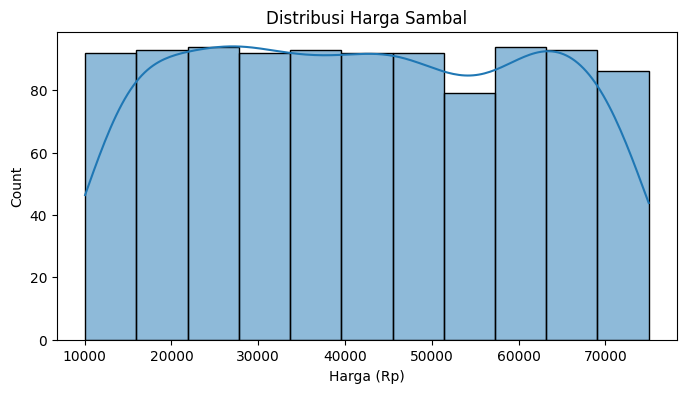

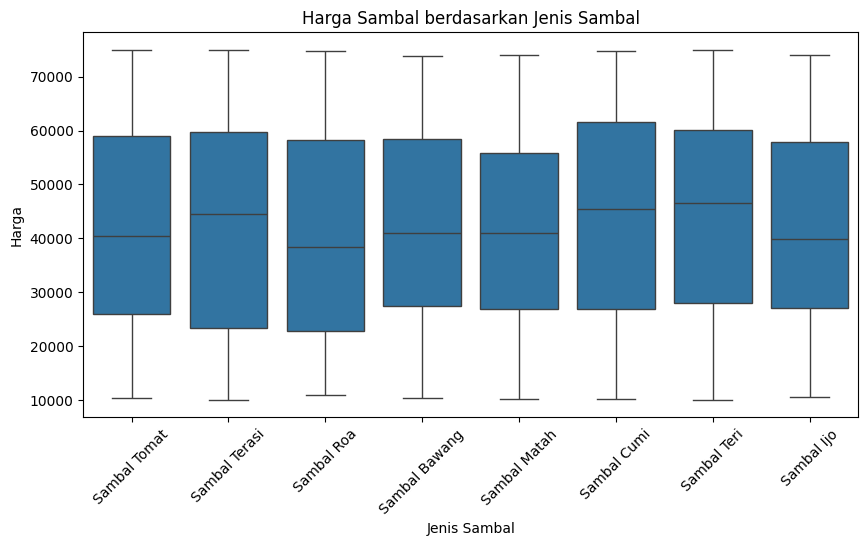

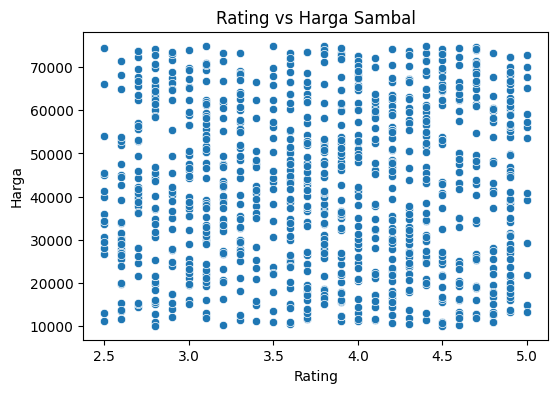

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Info dan ringkasan
print(df.info())
print(df.describe())

# Visualisasi 1: Distribusi Harga
plt.figure(figsize=(8, 4))
sns.histplot(df["Harga"], kde=True)
plt.title("Distribusi Harga Sambal")
plt.xlabel("Harga (Rp)")
plt.show()

# Visualisasi 2: Boxplot Harga berdasarkan Jenis Sambal
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Jenis Sambal", y="Harga")
plt.xticks(rotation=45)
plt.title("Harga Sambal berdasarkan Jenis Sambal")
plt.show()

# Visualisasi 3: Scatterplot Rating vs Harga
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Rating", y="Harga")
plt.title("Rating vs Harga Sambal")
plt.show()


Matriks Korelasi:
           Harga    Rating      Stok
Harga   1.000000  0.017320  0.044027
Rating  0.017320  1.000000 -0.005543
Stok    0.044027 -0.005543  1.000000


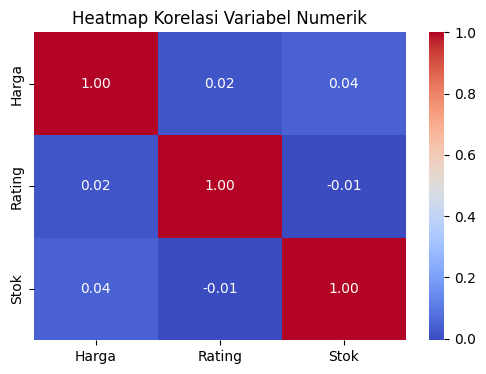

In [ ]:
# Konversi numerik
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df["Harga"] = pd.to_numeric(df["Harga"], errors="coerce")
df["Stok"] = pd.to_numeric(df["Stok"], errors="coerce")

# Korelasi antar variabel numerik
corr = df[["Harga", "Rating", "Stok"]].corr()
print("Matriks Korelasi:")
print(corr)

# Visualisasi korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Hapus nilai null
df_simple = df.dropna(subset=["Rating", "Harga"])

X = df_simple[["Rating"]]
y = df_simple["Harga"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


R2 Score (Sederhana): -0.007470037236730009
RMSE (Sederhana): 18853.92358835936


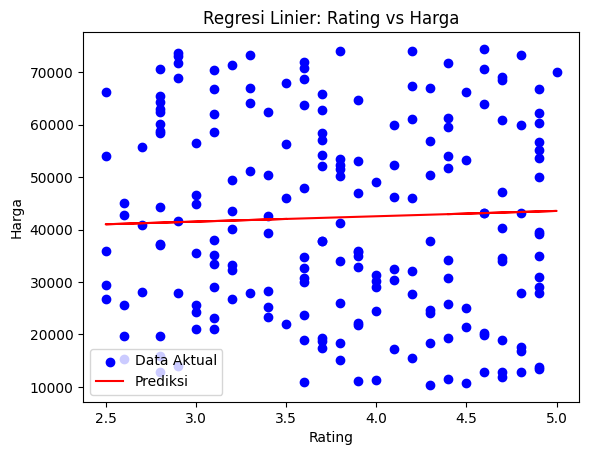

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("R2 Score (Sederhana):", r2_score(y_test, y_pred))
print("RMSE (Sederhana):", np.sqrt(mean_squared_error(y_test, y_pred)))

# Visualisasi prediksi
plt.scatter(X_test, y_test, color='blue', label="Data Aktual")
plt.plot(X_test, y_pred, color='red', label="Prediksi")
plt.xlabel("Rating")
plt.ylabel("Harga")
plt.title("Regresi Linier: Rating vs Harga")
plt.legend()
plt.show()


In [ ]:
df_multi = df.dropna(subset=["Rating", "Stok", "Harga"])

X_multi = df_multi[["Rating", "Stok"]]
y_multi = df_multi["Harga"]

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

print("R2 Score (Berganda):", r2_score(y_test, y_pred_multi))
print("RMSE (Berganda):", np.sqrt(mean_squared_error(y_test, y_pred_multi)))


R2 Score (Berganda): -0.007002571324519646
RMSE (Berganda): 18849.54897230441


Dari hasil model, regresi linier sederhana menunjukkan adanya pengaruh positif antara Rating dan Harga. Namun, regresi berganda memberikan evaluasi model yang lebih baik karena mempertimbangkan juga faktor Stok. Hasil evaluasi didukung oleh nilai R² dan RMSE yang menunjukkan performa prediktif model.